In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
def find_clusters(df, N):
    randomIdx = random.sample( range(0, len(df)),2)
    centroids = df[randomIdx]    
    
    for simulations in range(N):
        clusters = []
        for row in df:
            norm1 = np.sqrt(np.square(row[0] - centroids[0][0]) + np.square(row[1] - centroids[0][1]))
            norm2 = np.sqrt(np.square(row[0] - centroids[1][0]) + np.square(row[1] - centroids[1][1]))

            if norm1 < norm2:
                clusters.append(0)
            else:
                clusters.append(1)

        i=0
        count_of_cluster1=0
        count_of_cluster2=0
        c1_X = 0
        c1_Y = 0
        c2_X = 0
        c2_Y = 0

        for row in dataset:
            if clusters[i] == 0:
                c1_X = c1_X + row[0]
                c1_Y = c1_Y + row[1]
                count_of_cluster1 = count_of_cluster1 + 1

            elif clusters[i] == 1:
                c2_X = c2_X + row[0]
                c2_Y = c2_Y + row[1]
                count_of_cluster2 = count_of_cluster2 + 1
            i = i+1

        centroids[0][0] = c1_X/count_of_cluster1
        centroids[0][1] = c1_Y/count_of_cluster1
        centroids[1][0] = c2_X/count_of_cluster2
        centroids[1][1] = c2_Y/count_of_cluster2
    
    return centroids, clusters

In [3]:
df = pd.read_csv('faithful.csv')
print(df[['eruptions','waiting']].head())
dataset = df[['eruptions','waiting']].to_numpy()

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


In [331]:
iterations = 100
centroids, cluster_map = find_clusters(dataset,iterations)

In [332]:
# Initializing random Means and Cov Matrix from dataset
mean1 = centroids[0]
mean2 = centroids[1]
cov_1 = np.cov(dataset.T)
cov_2 = np.cov(dataset.T)
PI = 0.5

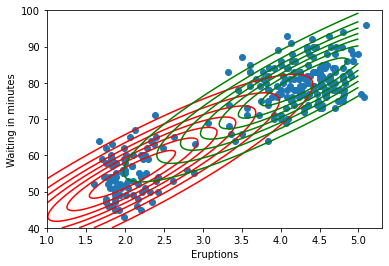

In [315]:
X1 = np.linspace(1,5,272)  
X2 = np.linspace(40,100,272)
X, Y = np.meshgrid(X1,X2) 

gause_1 = multivariate_normal(mean1, cov_1)  
gause_2 = multivariate_normal(mean2, cov_2)

ar = np.empty(X.shape + (2,))                
ar[:, :, 0] = X 
ar[:, :, 1] = Y   
                                                          
plt.scatter(dataset[:,0], dataset[:,1], marker='o')  
plt.contour(X, Y, gause_1.pdf(ar), colors="r" ) 
plt.contour(X, Y, gause_2.pdf(ar), colors="g" )
plt.xlabel('Eruptions')
plt.ylabel('Waiting in minutes')
plt.show()

In [316]:
def E_Step(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    cov_1=lis1[2]
    cov_2=lis1[3]
    pi=lis1[4]
    
    p2 = multivariate_normal.pdf(dataset, mu2, cov_2)
    p1 = multivariate_normal.pdf(dataset, mu1, cov_1)
    w1 = pi * p2
    w2 = (1-pi) * p1
    ex_val = w1/(w1+w2)

    return ex_val

In [324]:
def M_Step(ex_val):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(dataset)):
        num_mu1 += (1-ex_val[i]) * dataset[i]
        din_mu1 += (1-ex_val[i])

        num_mu2 += ex_val[i] * dataset[i]
        din_mu2 += ex_val[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(dataset)):

        q1 = np.matrix(dataset[i]-mu1)
        num_s1 += (1-ex_val[i]) * np.dot(q1.T, q1)
        din_s1 += (1-ex_val[i])

        q2 = np.matrix(dataset[i]-mu2)
        num_s2 += ex_val[i] * np.dot(q2.T, q2)
        din_s2 += ex_val[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(ex_val)/len(dataset)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [326]:
def plot(param_arr):

    mu1 = param_arr[0]
    mu2 = param_arr[1]
    s1 = param_arr[2]
    s2 = param_arr[3]
    Gauss_1 = multivariate_normal(mu1, s1)  
    Gauss_2 = multivariate_normal(mu2, s2)

    ar = np.empty(X.shape + (2,))                
    ar[:, :, 0] = X
    ar[:, :, 1] = Y   
    plt.scatter(dataset[:,0], dataset[:,1], marker='o')     
    plt.contour(X, Y, Gauss_1.pdf(ar), colors="r") 
    plt.contour(X, Y, Gauss_2.pdf(ar), colors="b") 
                                                             
    plt.scatter(dataset[:,0], dataset[:,1], marker='o')     
                                                 
    plt.xlabel('Eruptions')                                                  
    plt.ylabel('Waiting in munutes')                                                                            
    plt.show()

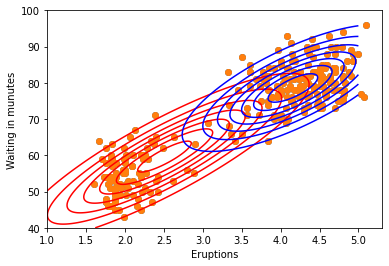

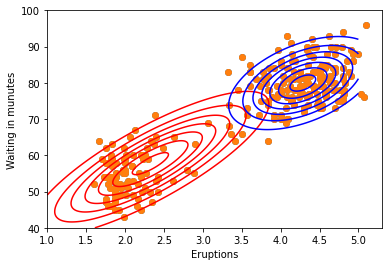

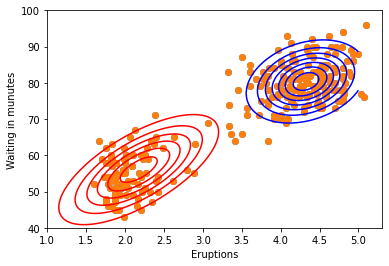

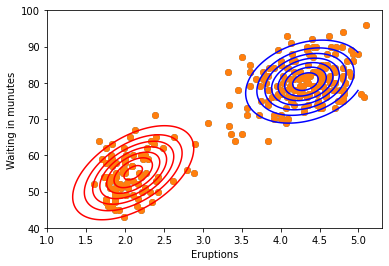

In [327]:
params_arr =[mean1,mean2,cov_1,cov_2,PI]
N = 4
for _ in range(N):
    expection = E_Step(params_arr)
    temp = M_Step(expection)
    params_arr = temp
    plot(params_arr)